# Dimensionality Reduction by Extracting Principal Components

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [43]:
col_name = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols',
           'Flavinoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 
            'OD280/OD315 of Diluted Wines', 'Proline']
df = pd.read_csv('Wine.csv')
df.columns = col_name

In [44]:
df.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavinoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [45]:
df.shape

(177, 14)

In [46]:
X = df.iloc[:,1:]

In [47]:
y = df['Class']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
X_train_sc = sc.fit_transform(X_train)
X_train_sc.shape

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(141, 13)

In [51]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca.explained_variance_ratio_

array([0.35670622, 0.19468297])

In [55]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.357 0.195]


In [58]:
pd.DataFrame(np.round(pca.components_, 3), columns = X.columns).T

,0,1
Alcohol,-0.102,0.494
Malic Acid,0.267,0.209
Ash,0.008,0.315
Alcalinity of Ash,0.235,-0.027
Magnesium,-0.126,0.261
Total Phenols,-0.385,0.110
Flavinoids,-0.421,0.028
Nonflavanoid Phenols,0.308,0.065
Proanthocyanins,-0.305,0.088
Color Intensity,0.115,0.532


In [59]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
pca.fit_transform(X_train_sc)

array([[ 3.39770684,  1.19458043,  1.57092996, ...,  1.08392754,
        -0.19272624, -0.22782093],
       [ 3.92135308,  0.49466892,  1.73659213, ...,  0.53374801,
        -0.23374373, -0.14208485],
       [-1.59171678, -1.89712336,  0.94212442, ...,  0.09635705,
        -0.18294503,  0.12117988],
       ...,
       [-2.28100579,  1.79911308,  0.03296037, ...,  0.39151638,
         0.48036603, -0.06017898],
       [-0.92880663, -2.21416587,  0.3027374 , ..., -0.4367813 ,
         0.29286954, -0.37632963],
       [ 0.47771285, -2.66552669, -0.63687218, ...,  0.40444126,
        -0.60343699, -0.18218483]])

In [61]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.357 0.195 0.115 0.073 0.061 0.053 0.04  0.028 0.023 0.019 0.017 0.011
 0.009]


In [62]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35670622, 0.55138919, 0.66682674, 0.73994739, 0.80120341,
       0.85377525, 0.89360409, 0.92129642, 0.94436016, 0.96376682,
       0.98047293, 0.99140825, 1.        ])

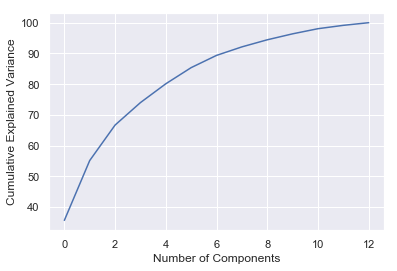

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

# Abalone

In [71]:
col_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
df2 = pd.read_csv('abalone.csv')
df2.columns = col_names
df2.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [74]:
X = df2.iloc[:,1:]

In [92]:
y = df2['Sex']
s_to_num = {'M' : 0,
           'F' : 1,
           'I' : 2}
df2['tmp'] = df2['Sex'].map(s_to_num)
y = df2['tmp']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [94]:
sc = StandardScaler()

In [95]:
X_train_sc = sc.fit_transform(X_train)

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [97]:
pca.fit_transform(X_train_sc)

array([[-2.90218146e-01,  4.44276403e-01, -1.68797436e-01, ...,
         5.73217549e-02, -1.09005793e-01, -8.96479409e-03],
       [-1.81483035e+00, -2.36234287e-01, -2.79839346e-01, ...,
         1.97065999e-01,  7.89376901e-02, -4.26233041e-03],
       [-4.18948504e+00, -1.69304845e-04, -3.50495748e-01, ...,
         1.53840304e-03,  7.54804676e-03,  9.28207772e-03],
       ...,
       [-8.15511071e-01,  5.72061136e-01, -5.96026013e-02, ...,
        -4.12813843e-02,  1.39911914e-02, -4.36446511e-02],
       [ 6.82762199e-01, -6.90443954e-01, -6.48520588e-01, ...,
         1.84568510e-01, -1.41276117e-01,  6.37000234e-02],
       [ 1.12889025e+00, -1.57161130e+00,  2.68986644e-01, ...,
         1.39584516e-01, -9.03668792e-02,  8.58953007e-02]])

In [98]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.836 0.088 0.035 0.021 0.011 0.008 0.002 0.001]


In [99]:
np.cumsum(pca.explained_variance_ratio_)

array([0.83612669, 0.92368399, 0.95829304, 0.9792597 , 0.99001022,
       0.99777291, 0.99929894, 1.        ])

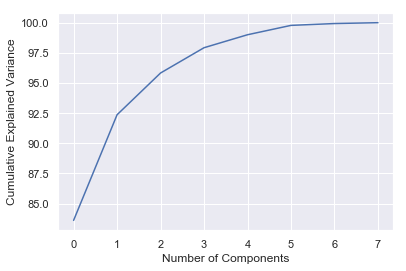

In [100]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

# Project Wine Visualizing PCA

In [101]:
col_name = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols',
           'Flavinoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 
            'OD280/OD315 of Diluted Wines', 'Proline']
df = pd.read_csv('Wine.csv')
df.columns = col_name
X = df.iloc[:,1:]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [102]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
pca = PCA(n_components=None)
pca.fit(X_train_sc)

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [107]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0,len(res))]

In [110]:
df3 = pd.DataFrame(res, columns = df.columns[1:],
                  index = index_name)[0:4]
df3.T.sort_values(by='PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3
Magnesium,-0.864710,-0.224275,0.803356,0.589078
Color Intensity,-0.750049,0.399586,1.525110,0.199910
Nonflavanoid Phenols,-0.402137,-0.060094,0.775030,0.103817
Proline,-0.227821,-0.142085,0.121180,-0.739354
OD280/OD315 of Diluted Wines,-0.192726,-0.233744,-0.182945,0.085016
Proanthocyanins,0.032335,-0.052185,0.043030,-0.136616
Alcalinity of Ash,0.047459,-0.410133,-1.136842,-0.950700
Flavinoids,0.143470,1.549705,2.086763,-0.899721
Total Phenols,0.882481,-0.797066,0.760848,2.715455
Hue,1.083928,0.533748,0.096357,-0.259311
